# Importting Librares

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
import os
from sklearn.metrics import confusion_matrix 
import re
from tqdm import tqdm

In [2]:
datafr = pd.read_csv('train_exit.csv', na_values = np.nan)
print(f'Shape : {datafr.shape}\n')
datafr.sample(3)

Shape : (13994, 30)



,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
13780,PLID_17053,Alva Bridge,18,M,Serbia,6'0,167lbs,69.0,70.0,55.0,...,Right,6.9,0.0,7.2,2.0,Medium,Talent Hunt,3.0,0.0,1
6179,PLID_5271,Kristeen Kennemer,23,M,Sweden,5'8,159lbs,64.0,85.0,86.0,...,Any,5.8,0.0,8.0,8.0,High,Academy,9.0,0.0,0
250,PLID_7402,Solomon Luera,24,F,Saudi Arabia,5'8,132lbs,58.0,75.0,74.0,...,Left,5.1,0.0,6.1,4.0,High,Academy,10.0,0.0,0


# Data Cleaning and Exploration

In [3]:
datafr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [4]:
nullDf = pd.DataFrame(datafr.isnull().sum()).reset_index().rename(columns = {'index' : 'ColumnNames', 0 : 'NullSum'})
nullDf['Percentage_NaN_Values'] = nullDf.NullSum*100/datafr.shape[0]
nullDf = nullDf.sort_values('Percentage_NaN_Values', ascending = False).reset_index(drop = True)
nullDf.query('NullSum != 0')

,ColumnNames,NullSum,Percentage_NaN_Values
0,strong_foot,1833,13.098471
1,behaviour_rating,703,5.023582
2,fitness_rating,695,4.966414
3,matches_played,666,4.759183
4,shot_accuracy,572,4.087466
5,weight,417,2.979849
6,ball_controlling_skills,413,2.951265
7,years_of_experience,144,1.029012
8,coaching,125,0.893240
9,penalties_conversion_rate,30,0.214378


In [5]:
datafr[nullDf.query('NullSum != 0').ColumnNames].sample(3)

,strong_foot,behaviour_rating,fitness_rating,matches_played,shot_accuracy,weight,ball_controlling_skills,years_of_experience,coaching,penalties_conversion_rate,mental_strength,jumping_skills,gender
3132,NaN,7.1,9.1,0.0,58.0,NaN,71.0,1.0,Talent Hunt,36.0,72.0,62.0,F
7922,Right,6.0,5.8,0.0,35.0,182lbs,32.0,3.0,Academy,38.0,58.0,62.0,F
5550,Right,6.4,8.3,0.0,64.0,143lbs,70.0,6.0,Unknown,47.0,69.0,84.0,F


In [6]:
datafr['weight'] = datafr.weight.apply(lambda wt : re.sub(r'lbs', '', wt) if not isinstance(wt, float) else np.nan)

cont_colms = ['behaviour_rating', 'fitness_rating', 'matches_played', 'shot_accuracy', 'ball_controlling_skills', 'years_of_experience', 'penalties_conversion_rate', 'mental_strength', 'jumping_skills', 'weight']
datafr[cont_colms] = datafr[cont_colms].fillna(datafr[cont_colms].median())

datafr[['gender', 'strong_foot', 'coaching']] = datafr[['gender', 'strong_foot', 'coaching']].apply(lambda x: x.fillna(x.value_counts().index[0]))

datafr.isnull().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

In [7]:
def convertWeight(row):
     return round(float(re.sub(r"'", '.', row)) * 30.48, 2)

In [8]:
datafr.height = datafr.height.apply(convertWeight)
datafr.weight = datafr.weight.astype(float)

datafr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13994 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  float64
 6   weight                     13994 non-null  float64
 7   ball_controlling_skills    13994 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13994 non-null  float64
 11  penalties_conversion_rate  13994 non-null  float64
 12  mental_strength            13994 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

# EDA

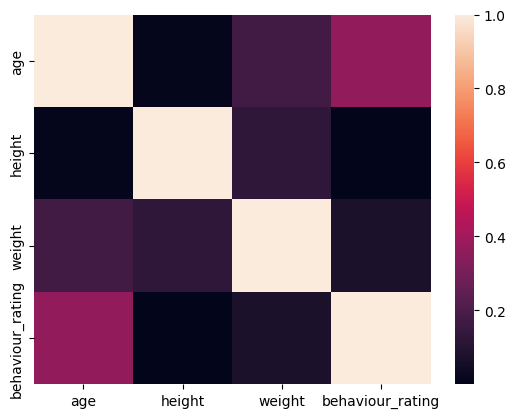

In [9]:
sns.heatmap(datafr.select_dtypes(['int', 'float'])[['age', 'height', 'weight', 'behaviour_rating']].corr())
plt.show()


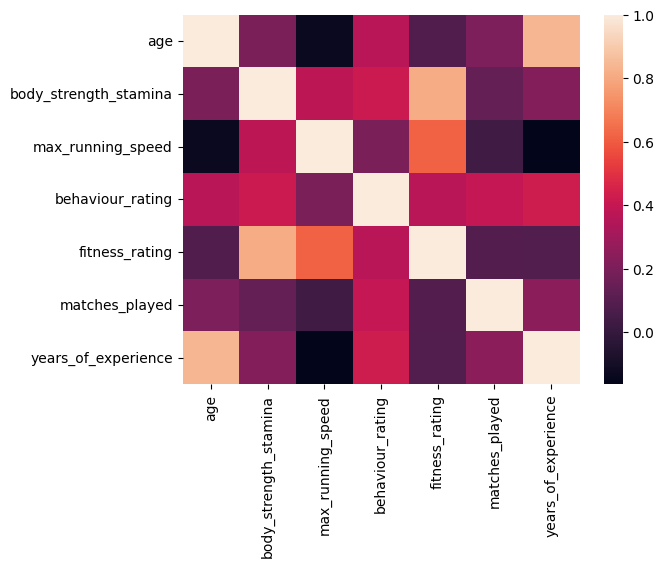

In [10]:
sns.heatmap(datafr.select_dtypes(['int', 'float'])[['age', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating', 'fitness_rating', 'matches_played', 'years_of_experience']].corr())
plt.show()

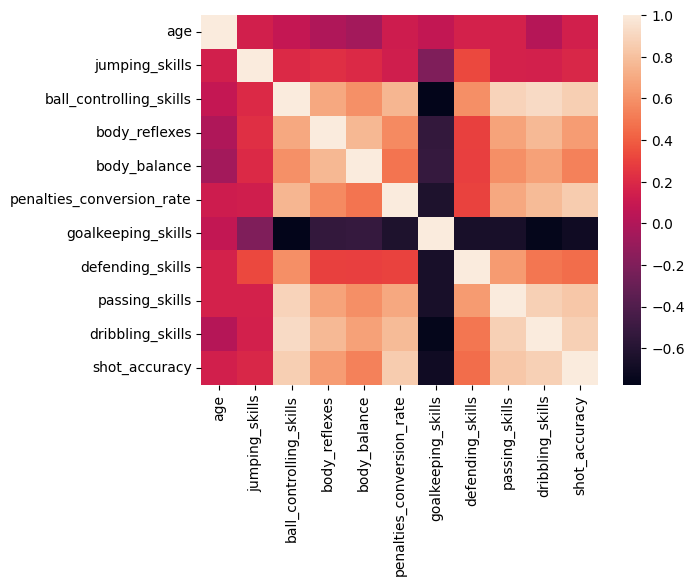

In [11]:
sns.heatmap(datafr.select_dtypes(['int', 'float'])[['age', 'jumping_skills', 'ball_controlling_skills', 'body_reflexes', 'body_balance',
                                                    'penalties_conversion_rate', 'goalkeeping_skills',
                                                    'defending_skills', 'passing_skills', 'dribbling_skills', 'shot_accuracy']].corr())
plt.show()

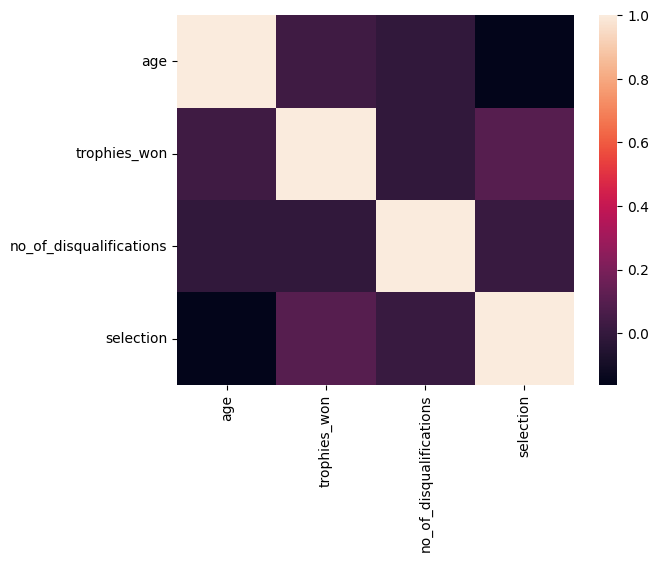

In [12]:
sns.heatmap(datafr.select_dtypes(['int', 'float'])[['age', 'trophies_won', 'no_of_disqualifications', 'selection']].corr())
plt.show()

# Encoding for ML Model

In [13]:
datafr.gender = pd.get_dummies(datafr.gender, drop_first = True)

datafr.join(pd.get_dummies(datafr.strong_foot, drop_first = True))

datafr.dedication_level = datafr.dedication_level.map({'High' : 3, 'Medium' : 2, 'Low' : 1})
datafr.coaching = datafr.coaching.map({'Academy' : 4, 'Source' : 3, 'Talent Hunt' : 2, 'Unknown' : 1})

In [14]:
LE = LabelEncoder()
datafr['country_code'] = LE.fit_transform(datafr['country'])

In [15]:
datafr = datafr.drop(['player_id', 'name', 'strong_foot', 'country'], axis = 1)

In [16]:
features = datafr.drop('selection', axis = 1)
target = datafr.selection

In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state = 0) 

# Model Training #1

In [18]:
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
cm = confusion_matrix(y_test, dtree_predictions)
cm

array([[ 809,  741],
       [ 279, 1670]])

In [19]:
print(f'Accuracy : DecisionTree :{round(accuracy_score(y_test, dtree_predictions) * 100, 2)}')

Accuracy : DecisionTree :70.85


# Model Training #2

In [20]:
gnb = GaussianNB()
model = gnb.fit(X_train, y_train)

In [21]:
predictive_labels = gnb.predict(X_test)
cm = confusion_matrix(y_test, predictive_labels)
cm

array([[1077,  473],
       [ 684, 1265]])

In [22]:
print(f'Accuracy : GaussianNB :{round(accuracy_score(y_test, predictive_labels) * 100, 2)}')

Accuracy : GaussianNB :66.93
